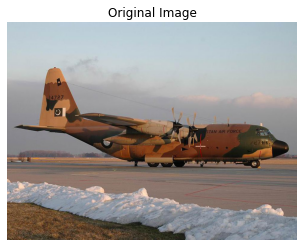

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_path = 'c130.jpg'
original_image = plt.imread(image_path)

# Display the original image
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()


In [24]:
def downsample_image(image):
    # Get the dimensions of the current image
    rows, cols, _ = image.shape
    # Create an image with half the dimensions
    downsampled_image = np.zeros((rows // 2, cols // 2, 3))
    # Fill the downsampled image with the average of 2x2 blocks from the original image
    for i in range(rows // 2):
        for j in range(cols // 2):
            for k in range(3):  # Assuming a 3-channel image
                downsampled_image[i, j, k] = np.mean(image[2*i:2*i+2, 2*j:2*j+2, k])
    return downsampled_image

# Create a Gaussian pyramid
gaussian_pyramid = [original_image]
while gaussian_pyramid[-1].shape[0] > 1 and gaussian_pyramid[-1].shape[1] > 1:
    gaussian_pyramid.append(downsample_image(gaussian_pyramid[-1]))


In [25]:
def upsample_image(image):
    # Get the dimensions of the current image
    rows, cols, _ = image.shape
    # Create an image with double the dimensions
    upsampled_image = np.zeros((rows * 2, cols * 2, 3))
    # Fill the upsampled image by placing the original image's pixels into the new image
    for i in range(rows):
        for j in range(cols):
            for k in range(3):  # Assuming a 3-channel image
                upsampled_image[2*i:2*i+2, 2*j:2*j+2, k] = image[i, j, k]
    return upsampled_image

# Create a Laplacian pyramid
laplacian_pyramid = []
for i in range(len(gaussian_pyramid) - 1):
    upsampled_image = upsample_image(gaussian_pyramid[i+1])
    laplacian_level = gaussian_pyramid[i] - upsampled_image[:gaussian_pyramid[i].shape[0], :gaussian_pyramid[i].shape[1]]
    laplacian_pyramid.append(laplacian_level)


ValueError: operands could not be broadcast together with shapes (364,485,3) (364,484,3) 

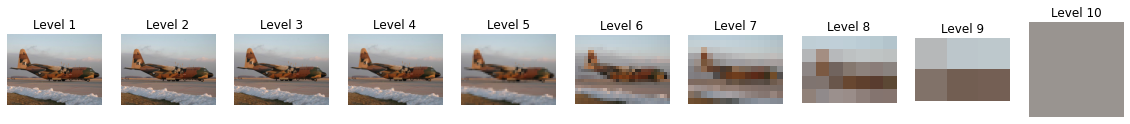

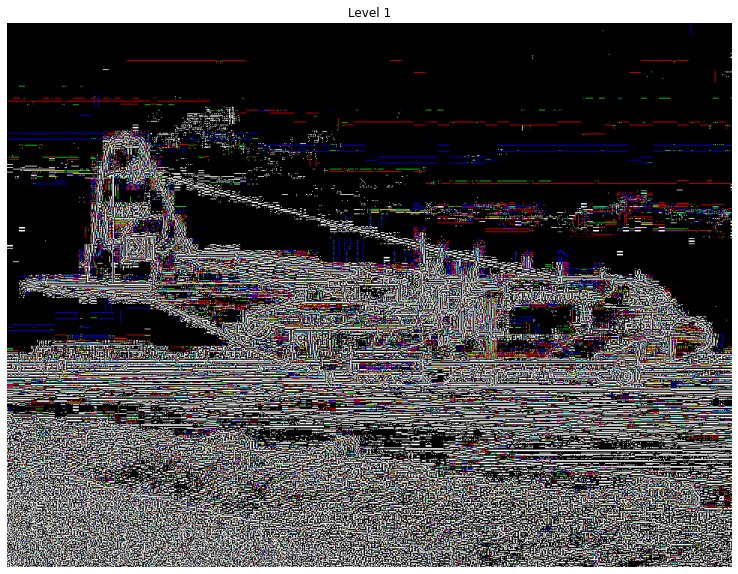

In [26]:
# Display Gaussian Pyramid
plt.figure(figsize=(20, 10))
for i, image in enumerate(gaussian_pyramid):
    plt.subplot(1, len(gaussian_pyramid), i+1)
    plt.imshow(image.astype(np.uint8))
    plt.title(f'Level {i+1}')
    plt.axis('off')
plt.show()

# Display Laplacian Pyramid
plt.figure(figsize=(20, 10))
for i, image in enumerate(laplacian_pyramid):
    plt.subplot(1, len(laplacian_pyramid), i+1)
    plt.imshow(image.astype(np.uint8))
    plt.title(f'Level {i+1}')
    plt.axis('off')
plt.show()


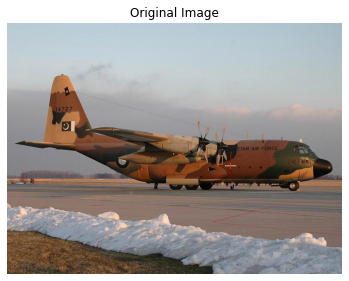

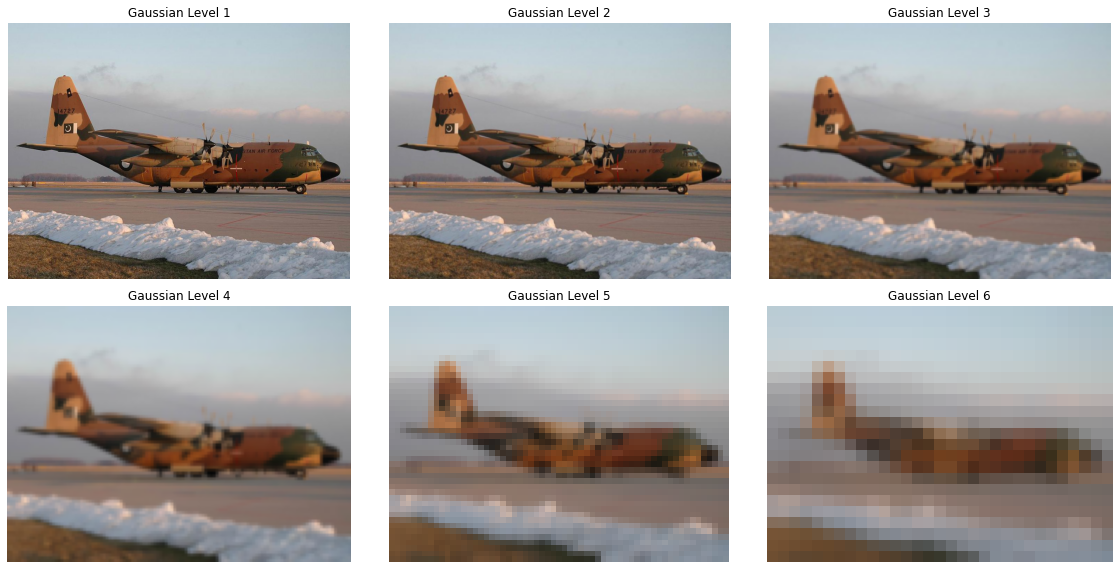

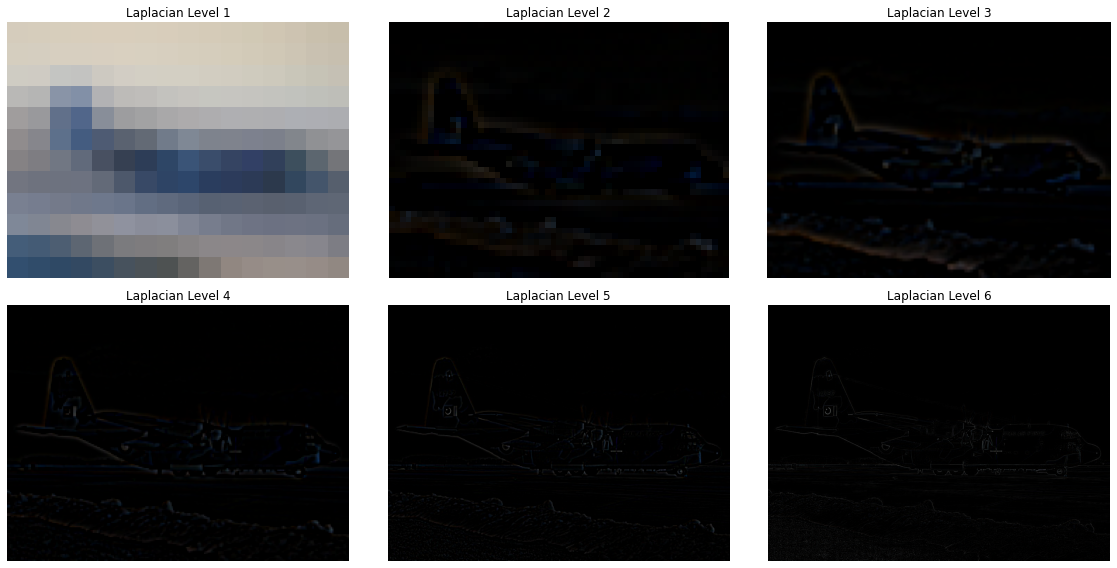

In [28]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
image_path = 'c130.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) # Convert to RGB for matplotlib

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Generate Gaussian Pyramid
G = original_image.copy()
gaussian_pyramid = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gaussian_pyramid.append(G)

# Generate Laplacian Pyramid
laplacian_pyramid = [gaussian_pyramid[-1]]
for i in range(5, 0, -1):
    GE = cv2.pyrUp(gaussian_pyramid[i])
    GE = cv2.resize(GE, (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0]))  # Resize GE
    L = cv2.subtract(gaussian_pyramid[i-1], GE)
    laplacian_pyramid.append(L)


# Display Gaussian Pyramid
plt.figure(figsize=(16, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(gaussian_pyramid[i], cmap='gray')
    plt.title(f'Gaussian Level {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Display Laplacian Pyramid
plt.figure(figsize=(16, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(laplacian_pyramid[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Laplacian Level {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()



1. **Import Libraries:**
   - `cv2` for using OpenCV, a powerful library for image processing.
   - `matplotlib.pyplot` for plotting images.

2. **Load and Display the Original Image:**
   - We load the image using `cv2.imread()` from the specified path.
   - OpenCV reads images in BGR format by default, so we convert it to RGB using `cv2.cvtColor()` for correct color representation when displaying.
   - Then, we display the original image using `plt.imshow()` from Matplotlib, setting the title and turning off the axis.

3. **Generate Gaussian Pyramid:**
   - We start with the original image and iteratively reduce its resolution using `cv2.pyrDown()`.
   - Each time we apply `pyrDown`, the image size is reduced by a factor of 2.
   - The resulting images are stored in a list called `gaussian_pyramid`.

4. **Generate Laplacian Pyramid:**
   - The Laplacian Pyramid is created by subtracting the expanded version of the Gaussian Pyramid's next level from the current level.
   - `cv2.pyrUp()` is used to expand the image size by a factor of 2. We make sure to match the size with the corresponding level in the Gaussian Pyramid to perform the subtraction correctly.
   - The `cv2.subtract()` function computes the difference between images, which gives us the Laplacian level.
   - These Laplacian levels are stored in a list called `laplacian_pyramid`.

5. **Display Gaussian Pyramid:**
   - We create a plot with multiple subplots to display each level of the Gaussian Pyramid.
   - For each level, we convert the image back to RGB (since OpenCV uses BGR) and display it with `plt.imshow()`.
   - We set the title for each subplot to indicate the level of the pyramid.

6. **Display Laplacian Pyramid:**
   - Similarly, we display each level of the Laplacian Pyramid.
   - Again, we ensure to convert the image to RGB before displaying.
   - Each subplot is labeled with the level of the pyramid.

Through these steps, we create and visualize two types of Image Pyramids:

- **Gaussian Pyramid:** This is a set of images that are repeatedly smoothed and subsampled. It is useful for image downsampling.
- **Laplacian Pyramid:** This pyramid represents the multiscale signal where each level is the difference between levels in the Gaussian Pyramid. It is used in image compression, image blending, and object recognition, among other things.

The visual output consists of two sets of images. The first set shows the Gaussian Pyramid with the original image at the top, followed by progressively smaller images. The second set shows the Laplacian Pyramid, where each image highlights the edges and details that differ from one level of the Gaussian Pyramid to the next.

In a "dry run" of the code, it would take the original image, create smaller and blurrier versions for the Gaussian Pyramid, then calculate the detail lost at each step to form the Laplacian Pyramid. Each pyramid helps in understanding the image content at different scales and resolutions.

Subband coding is a technique used in signal processing and data compression where a signal is passed through a series of filters to divide it into several frequency bands. The idea is to process or encode each band independently, which can be more efficient for some types of data. This is commonly used in image and audio compression standards like JPEG and MP3.



```sh
pip install PyWavelets
```

Next, we will write the code to perform subband coding on the image.

### Step 1: Import Required Libraries

```python
import pywt
import matplotlib.pyplot as plt
```

### Step 2: Load and Display the Image

```python
# Load the image
image_path = '/mnt/data/c130.jpg'
image = plt.imread(image_path)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()
```

### Step 3: Perform Wavelet Decomposition

```python
# Perform a single level wavelet decomposition
coeffs = pywt.dwt2(image, 'haar')

# The result is a tuple of arrays (cA, (cH, cV, cD))
cA, (cH, cV, cD) = coeffs
```

### Step 4: Display Subbands

```python
# Display the approximation and detail coefficients
plt.figure(figsize=(12, 3))
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

for i, a in enumerate([cA, cH, cV, cD]):
    plt.subplot(1, 4, i + 1)
    plt.imshow(a, cmap='gray', aspect='auto')
    plt.title(titles[i])
    plt.axis('off')

plt.show()
```

### Step 5: Reconstruct the Image

```python
# Reconstruct the image from the wavelet coefficients
reconstructed_image = pywt.idwt2(coeffs, 'haar')

# Display the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()
```

Now, let's discuss each part of the code:

1. **Importing Libraries:** `pywt` is a Python library for wavelet transforms, which we're using for subband coding. `matplotlib.pyplot` is used for displaying the images.

2. **Loading and Displaying the Image:** We load the image from the specified path and display it. `plt.imread` reads the image file.

3. **Performing Wavelet Decomposition:** We use `pywt.dwt2`, which is a function that performs a single level 2-dimensional discrete wavelet transform. This decomposes the image into a low-frequency component (cA) and three high-frequency components (cH, cV, cD) that capture horizontal, vertical, and diagonal details, respectively.

4. **Displaying Subbands:** We plot the approximation and detail coefficients. These subbands show different aspects of the image in terms of spatial frequency. The approximation is the low-frequency part, while the details contain higher frequency information that represents the edges and textures.

5. **Reconstructing the Image:** The `pywt.idwt2` function is the inverse of `pywt.dwt2`, and it reconstructs the image from the wavelet coefficients. This demonstrates that the original image can be reconstructed from its subbands without loss of information.




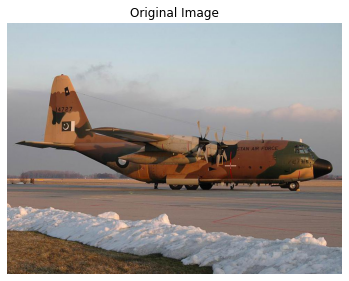

In [30]:
import pywt
import matplotlib.pyplot as plt
# Load the image
image_path = 'c130.jpg'
image = plt.imread(image_path)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


In [31]:
# Perform a single level wavelet decomposition
coeffs = pywt.dwt2(image, 'haar')

# The result is a tuple of arrays (cA, (cH, cV, cD))
cA, (cH, cV, cD) = coeffs

TypeError: Invalid shape (728, 485, 2) for image data

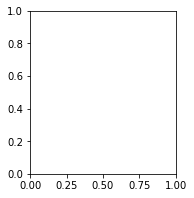

In [32]:
# Display the approximation and detail coefficients
plt.figure(figsize=(12, 3))
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

for i, a in enumerate([cA, cH, cV, cD]):
    plt.subplot(1, 4, i + 1)
    plt.imshow(a, cmap='gray', aspect='auto')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


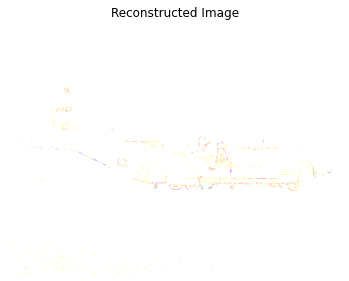

In [33]:
# Reconstruct the image from the wavelet coefficients
reconstructed_image = pywt.idwt2(coeffs, 'haar')

# Display the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


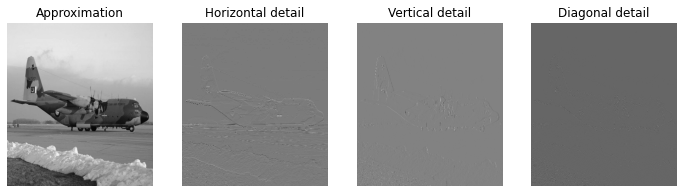

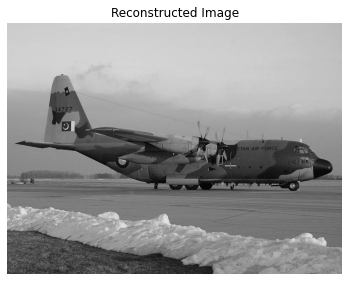

In [35]:
import pywt
import matplotlib.pyplot as plt

# Function to load image and convert to grayscale
def load_image(image_path):
    # Read the image
    image = plt.imread(image_path)
    # If the image has more than one channel, convert it to grayscale by averaging the channels
    if len(image.shape) > 2:
        image = image.mean(axis=2)
    return image

# Load the grayscale image
image_path = 'c130.jpg'
image = load_image(image_path)

# Perform a single level wavelet decomposition
coeffs = pywt.dwt2(image, 'haar')

# The result is a tuple of arrays (cA, (cH, cV, cD))
cA, (cH, cV, cD) = coeffs

# Display the approximation and detail coefficients
plt.figure(figsize=(12, 3))
titles = ['Approximation', 'Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for i, a in enumerate([cA, cH, cV, cD]):
    plt.subplot(1, 4, i + 1)
    plt.imshow(a, cmap='gray', aspect='auto')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

# Reconstruct the image from the wavelet coefficients
reconstructed_image = pywt.idwt2(coeffs, 'haar')

# Display the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


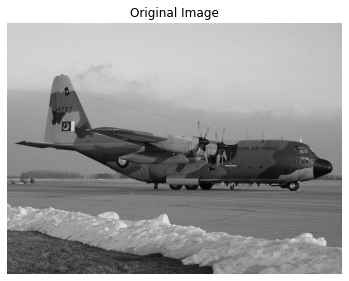

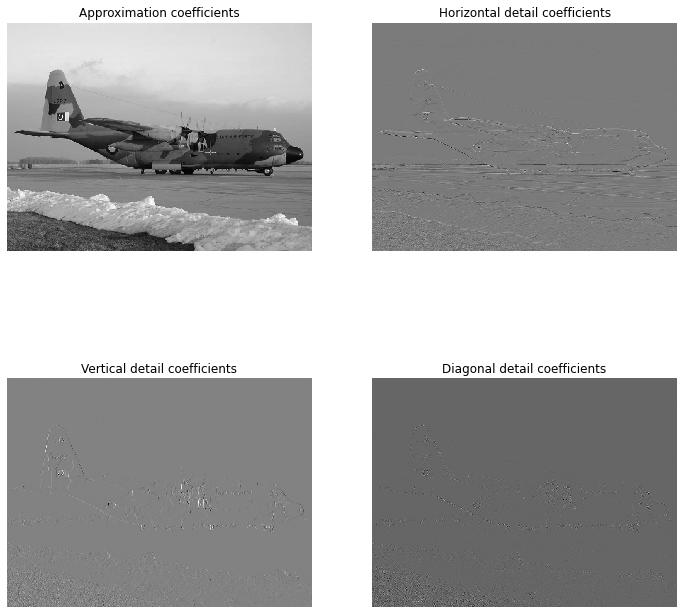

In [36]:
# Install the pywavelets package
!pip install PyWavelets

import pywt
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'c130.jpg'
image = plt.imread(image_path)

# Check if the image is in grayscale or convert it to grayscale
if image.ndim == 3 and image.shape[2] == 3:
    # Convert to grayscale by taking the mean of the RGB channels
    image = image.mean(axis=2)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Perform 2D Discrete Wavelet Transform
coeffs = pywt.dwt2(image, 'haar')

# coeffs is a tuple: (cA, (cH, cV, cD))
# cA: Approximation coefficients
# cH: Horizontal detail coefficients
# cV: Vertical detail coefficients
# cD: Diagonal detail coefficients

# Extract the individual arrays
cA, (cH, cV, cD) = coeffs

# Display the approximation and details
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(cA, cmap='gray', interpolation='nearest')
plt.title('Approximation coefficients')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cH, cmap='gray', interpolation='nearest')
plt.title('Horizontal detail coefficients')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cV, cmap='gray', interpolation='nearest')
plt.title('Vertical detail coefficients')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cD, cmap='gray', interpolation='nearest')
plt.title('Diagonal detail coefficients')
plt.axis('off')

plt.show()


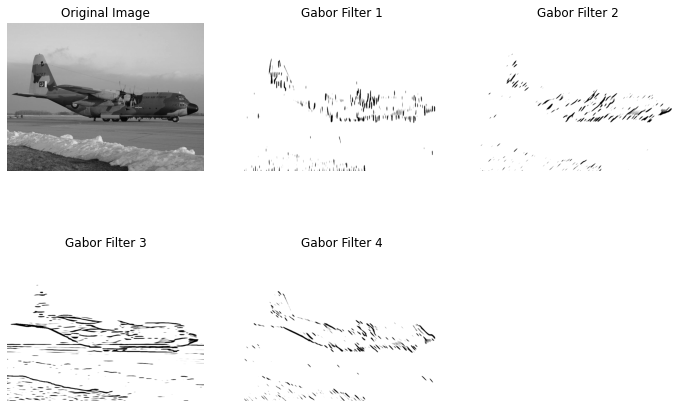

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to load image in grayscale
def load_image_in_grayscale(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image.astype(np.float32)

# Function to generate Gabor filter bank
def generate_gabor_filter_bank(ksize, sigma, lambd, gamma, psi):
    filter_bank = []
    for theta in np.arange(0, np.pi, np.pi / 4): # 0, 45, 90, 135 degrees
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
        filter_bank.append(kern)
    return filter_bank

# Function to apply Gabor filters to an image
def apply_gabor_filters(image, filter_bank):
    filtered_images = []
    for kern in filter_bank:
        fimg = cv2.filter2D(image, cv2.CV_8UC3, kern)
        filtered_images.append(fimg)
    return filtered_images

# Load the image
image_path = 'c130.jpg'
image = load_image_in_grayscale(image_path)

# Define Gabor filter bank parameters
ksize = 31 # Size of the filter
sigma = 4 # Standard deviation of the gaussian envelope
lambd = 10 # Wavelength of the sinusoidal factor
gamma = 0.5 # Spatial aspect ratio
psi = 0 # Phase offset

# Generate Gabor filter bank
gabor_filter_bank = generate_gabor_filter_bank(ksize, sigma, lambd, gamma, psi)

# Apply Gabor filter bank to the image
gabor_responses = apply_gabor_filters(image, gabor_filter_bank)

# Displaying the original and filtered images using matplotlib
plt.figure(figsize=(12, 12))

# Original image
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gabor filtered images
for i, filtered_image in enumerate(gabor_responses, start=2):
    plt.subplot(3, 3, i)
    plt.imshow(filtered_image, cmap='gray')
    title = f"Gabor Filter {i-1}"
    plt.title(title)
    plt.axis('off')

plt.show()


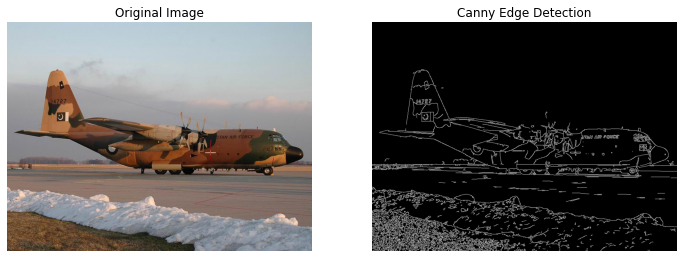

In [38]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'c130.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges_canny = cv2.Canny(gray_image, 100, 200)

# Display the original and edge-detected images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Original Image')
plt.axis('off')

# Canny edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()



1. **Import Libraries:**
   ```python
   import cv2
   import matplotlib.pyplot as plt
   ```
   We import the OpenCV library with the alias `cv2`, which is a comprehensive library used for computer vision tasks including image processing. We also import `matplotlib.pyplot` with the alias `plt`, which is a plotting library we use to display images.

2. **Load the Image:**
   ```python
   image_path = '/mnt/data/c130.jpg'
   image = cv2.imread(image_path)
   ```
   We set the path to the image file and use OpenCV's `imread` function to load the image from the specified path. The image is loaded in the BGR (Blue, Green, Red) color space.

3. **Convert to Grayscale:**
   ```python
   gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   ```
   Before performing edge detection, we convert the image to grayscale using OpenCV's `cvtColor` function, which changes the color space from BGR to grayscale. Edge detection is typically performed on grayscale images as color information is not necessary for detecting edges.

4. **Apply Canny Edge Detector:**
   ```python
   edges_canny = cv2.Canny(gray_image, 100, 200)
   ```
   The `Canny` function is applied to the grayscale image. It takes in two threshold values, 100 and 200 in this case. These thresholds are used for the hysteresis procedure within the Canny algorithm: edges with a gradient intensity above the high threshold are marked as strong edges, while those below the low threshold are suppressed; edges with intensity between the two thresholds are marked as weak edges and only considered if they are connected to strong edges. This process helps reduce noise.

5. **Display the Images:**
   ```python
   plt.figure(figsize=(12, 6))
   ```
   We start by creating a figure with a specific size to contain our subplots (the original and edge-detected images).

6. **Display the Original Image:**
   ```python
   plt.subplot(1, 2, 1)
   plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
   plt.title('Original Image')
   plt.axis('off')
   ```
   In the first subplot, we display the original image. We convert the color space from BGR to RGB to display the image correctly using `matplotlib`, as it expects the RGB format. We set the title of the subplot and remove the axis for better visual presentation.

7. **Display the Canny Edge-Detected Image:**
   ```python
   plt.subplot(1, 2, 2)
   plt.imshow(edges_canny, cmap='gray')
   plt.title('Canny Edge Detection')
   plt.axis('off')
   ```
   In the second subplot, we display the image after edge detection. The `cmap='gray'` argument specifies that the image should be displayed in grayscale. We set the title and remove the axis as before.

8. **Show the Plot:**
   ```python
   plt.show()
   ```
   Finally, we use `plt.show()` to render and display the whole plot containing our images.

The output consists of two side-by-side images: the original image on the left and the result of the Canny edge detection on the right. The edges are highlighted in white against a black background, showcasing the detected edges of various objects in the image. This edge detection technique is commonly used in various computer vision applications such as object recognition, image segmentation, and tracking.

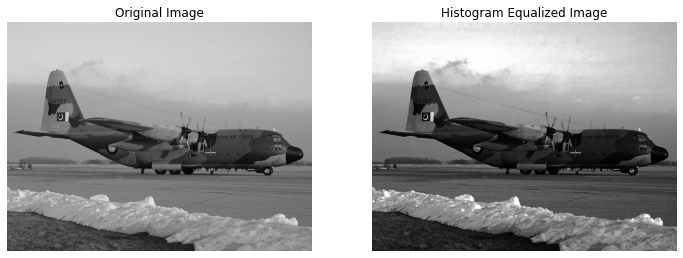

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Since the execution state has been reset, we need to re-define the helper function to load the image in grayscale.
def load_image_in_grayscale(image_path):
    image = plt.imread(image_path)
    # Convert to grayscale by averaging channels if it's a color image
    if len(image.shape) == 3:
        return np.mean(image, axis=2).astype(np.uint8)
    else:
        return image.astype(np.uint8)

# Load the image in grayscale
image_path = 'c130.jpg'
original_image = load_image_in_grayscale(image_path)

# Histogram Equalization using OpenCV
equalized_image = cv2.equalizeHist(original_image)

# Displaying the original and equalized images using matplotlib
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()



1. **Import Libraries:**
   - `cv2`: OpenCV library used for computer vision tasks.
   - `numpy`: Library for numerical operations in Python.
   - `matplotlib.pyplot`: Matplotlib's module used for plotting graphs and displaying images.

2. **Load the Image in Grayscale:**
   - We define a helper function `load_image_in_grayscale` to load the provided image. It uses `matplotlib`'s `imread` function to read the image data.
   - If the image has three channels (RGB), we convert it to grayscale by averaging the channels. The `astype(np.uint8)` ensures that the pixel values are in the proper 8-bit format.

3. **Histogram Equalization:**
   - We use OpenCV's `equalizeHist` function, which performs histogram equalization on the grayscale image. This function redistributes the image intensity to span the whole range of pixel values, effectively increasing the global contrast of the image, especially when the image's usable data is represented by close contrast values.

4. **Displaying Images:**
   - We use `matplotlib` to display both the original and the equalized images for comparison.
   - Two subplots are created: the first for the original image (`subplot(1, 2, 1)`) and the second for the histogram equalized image (`subplot(1, 2, 2)`).
   - `cmap='gray'` sets the colormap of the images to grayscale to reflect the actual image color mapping.
   - `title` is used to set titles for the subplots, and `axis('off')` removes the axis values for a cleaner look.

5. **Execution:**
   - Upon execution, the code loads the `c130.jpg` image in grayscale, applies histogram equalization, and then displays both versions side by side.

The output consists of two images placed side by side. The original image is on the left, and the histogram equalized image is on the right. The effect of histogram equalization can be seen as an increase in the contrast, which makes the features of the airplane more distinguishable compared to the original image.

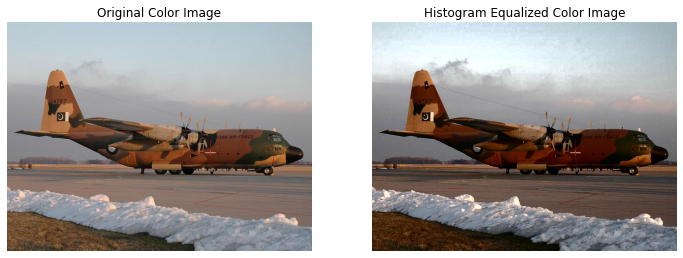

In [40]:
# Since the original image was loaded as grayscale, we need to load it again in color
def load_image_in_color(image_path):
    # Using cv2.imread to load the image in BGR format
    image = cv2.imread(image_path)
    # Convert to RGB for display purposes
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

# Load the image in color
original_color_image = load_image_in_color(image_path)

# Histogram Equalization for colored image
# First, convert the image from RGB to YCrCb color space since equalization is applied on the luminance channel (Y channel)
image_ycrcb = cv2.cvtColor(original_color_image, cv2.COLOR_RGB2YCrCb)

# Split the channels
y_channel, cr_channel, cb_channel = cv2.split(image_ycrcb)

# Equalize the Y channel
y_channel_eq = cv2.equalizeHist(y_channel)

# Merge the channels back
image_ycrcb_eq = cv2.merge((y_channel_eq, cr_channel, cb_channel))

# Convert back to RGB color space from YCrCb
equalized_color_image = cv2.cvtColor(image_ycrcb_eq, cv2.COLOR_YCrCb2RGB)

# Displaying the original and equalized images using matplotlib
plt.figure(figsize=(12, 6))

# Original color image
plt.subplot(1, 2, 1)
plt.imshow(original_color_image)
plt.title('Original Color Image')
plt.axis('off')

# Equalized color image
plt.subplot(1, 2, 2)
plt.imshow(equalized_color_image)
plt.title('Histogram Equalized Color Image')
plt.axis('off')

plt.show()


Histogram equalization on a colored image is a bit different from doing it on a grayscale image. In a colored image, histogram equalization is typically performed on the luminance channel (Y) while leaving the color channels (Cb and Cr in YCrCb color space) unchanged. Here's how the code works:

1. **Load the Image in Color:**
   - We use the `cv2.imread` function from OpenCV to load the image from the specified path.
   - OpenCV loads images in BGR format by default, so we convert the image to RGB using `cv2.cvtColor` for accurate color representation when displaying it.

2. **Convert to YCrCb Color Space:**
   - Color images are converted to YCrCb color space because histogram equalization should be applied only to the luminance channel (Y), without altering the color information (Cr and Cb channels).

3. **Split and Equalize the Y Channel:**
   - The YCrCb image is split into its three channels: Y, Cr, and Cb using `cv2.split`.
   - The Y channel, which represents luminance, is then equalized using `cv2.equalizeHist`, enhancing the contrast of the image.
   
4. **Merge Channels and Convert Back to RGB:**
   - After equalization of the Y channel, we merge it back with the Cr and Cb channels using `cv2.merge`.
   - The merged image is then converted back to the RGB color space for display.

5. **Displaying the Images:**
   - The figure is set to a size of 12x6 inches for better visibility.
   - The original RGB image and the histogram equalized RGB image are displayed side by side using `matplotlib.pyplot` with subplots.
   - The titles are set for each subplot, and the axis ticks are turned off for a cleaner look.

Upon execution, you can see the original colored image on the left and the histogram equalized colored image on the right. The effect of the histogram equalization is visible as a general increase in the image contrast, making the details more pronounced. This process is particularly useful in improving the visibility of features in images where the contrast is poor.

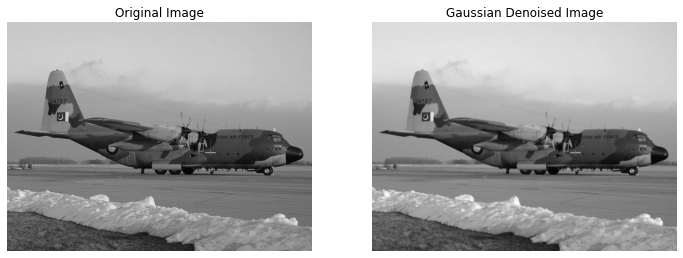

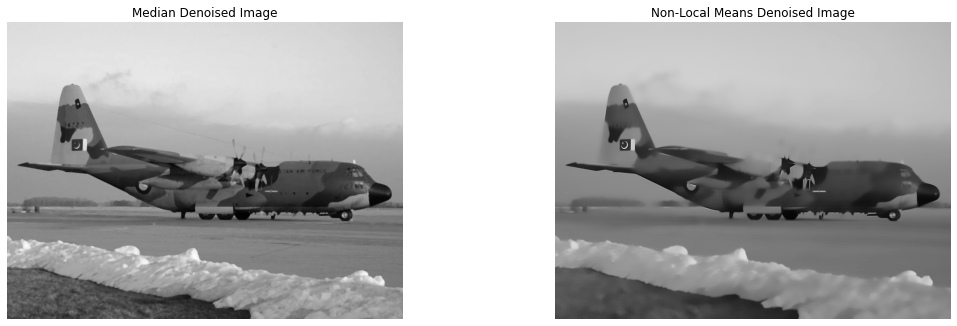

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = 'c130.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Apply Gaussian blur as a denoising method
gaussian_denoised = cv2.GaussianBlur(original_image, (5, 5), 0)

# Display the denoised image
plt.subplot(1, 2, 2)
plt.imshow(gaussian_denoised, cmap='gray')
plt.title('Gaussian Denoised Image')
plt.axis('off')
plt.show()

# Apply Median blur as a denoising method
median_denoised = cv2.medianBlur(original_image, 5)

# Apply Non-Local Means Denoising
nlm_denoised = cv2.fastNlMeansDenoising(original_image, None, 30, 7, 21)

# Display all denoised images
plt.figure(figsize=(18, 12))

# Median denoised image
plt.subplot(2, 2, 1)
plt.imshow(median_denoised, cmap='gray')
plt.title('Median Denoised Image')
plt.axis('off')

# Non-Local Means Denoised image
plt.subplot(2, 2, 2)
plt.imshow(nlm_denoised, cmap='gray')
plt.title('Non-Local Means Denoised Image')
plt.axis('off')

plt.show()


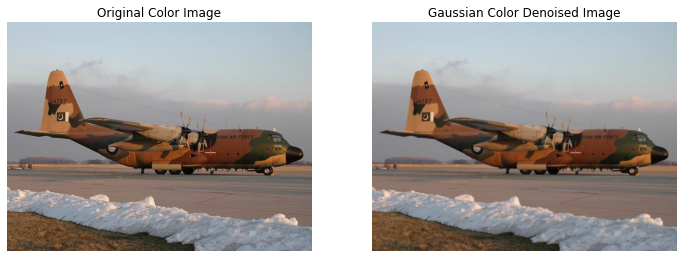

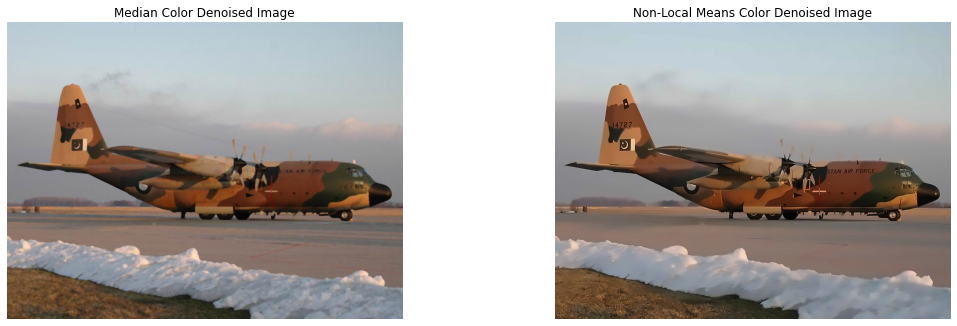

In [42]:
# Re-import libraries after the reset and reload the image in color this time
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color
image_path = 'c130.jpg'
original_color_image = cv2.imread(image_path)

# Convert from BGR to RGB
original_color_image = cv2.cvtColor(original_color_image, cv2.COLOR_BGR2RGB)

# Display the original color image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_color_image)
plt.title('Original Color Image')
plt.axis('off')

# Apply Gaussian blur as a denoising method on the color image
gaussian_color_denoised = cv2.GaussianBlur(original_color_image, (5, 5), 0)

# Display the denoised color image
plt.subplot(1, 2, 2)
plt.imshow(gaussian_color_denoised)
plt.title('Gaussian Color Denoised Image')
plt.axis('off')
plt.show()

# Apply Median blur as a denoising method on the color image
median_color_denoised = cv2.medianBlur(original_color_image, 5)

# Apply Non-Local Means Denoising on the color image
nlm_color_denoised = cv2.fastNlMeansDenoisingColored(original_color_image, None, 10, 10, 7, 21)

# Display all denoised images
plt.figure(figsize=(18, 12))

# Median denoised color image
plt.subplot(2, 2, 1)
plt.imshow(median_color_denoised)
plt.title('Median Color Denoised Image')
plt.axis('off')

# Non-Local Means Color Denoised image
plt.subplot(2, 2, 2)
plt.imshow(nlm_color_denoised)
plt.title('Non-Local Means Color Denoised Image')
plt.axis('off')

plt.show()



### Loading and Displaying the Original Color Image
```python
original_color_image = cv2.imread(image_path)
original_color_image = cv2.cvtColor(original_color_image, cv2.COLOR_BGR2RGB)
```
The color image is loaded with OpenCV's `imread` function without the grayscale flag, meaning it retains its color information. OpenCV loads images in BGR format by default, so we convert it to RGB to display it correctly using `matplotlib`.

We then display the original image in a subplot. The `imshow` function, without the `cmap` parameter, displays the color image.

### Denoising the Color Image with Gaussian Blur
```python
gaussian_color_denoised = cv2.GaussianBlur(original_color_image, (5, 5), 0)
```
Gaussian blur is applied to the color image using the `cv2.GaussianBlur` method. The function takes the image, the kernel size (5x5 in this case), and the standard deviation in the X direction (`0` lets OpenCV automatically calculate it based on the kernel size). Gaussian blur is effective at reducing Gaussian noise and smoothing the image.

### Displaying the Gaussian Denoised Color Image
We display the Gaussian denoised image in the second subplot, showing the effect of the Gaussian blur on the original image.

### Denoising the Color Image with Median Blur
```python
median_color_denoised = cv2.medianBlur(original_color_image, 5)
```
The median blur is another denoising technique, applied using the `cv2.medianBlur` method. It replaces each pixel's value with the median value of the intensities in the kernel area. The second parameter `5` indicates a 5x5 kernel. Median blur is particularly effective at removing salt-and-pepper noise.

### Denoising the Color Image with Non-Local Means
```python
nlm_color_denoised = cv2.fastNlMeansDenoisingColored(original_color_image, None, 10, 10, 7, 21)
```
Non-Local Means Denoising is a more sophisticated method that maintains more details compared to Gaussian and median blurs. It uses a `cv2.fastNlMeansDenoisingColored` function for color images. The parameters control the strength of the denoising (`10` for both color and spatial windows in this case), and the last two parameters define template window size and search window size.

### Displaying All Denoised Images
Finally, we display all the denoised images in a larger figure with subplots to compare the different methods. The images show the visual improvements in terms of noise reduction while preserving the details to different extents, depending on the method used.

Each denoising technique has its own strengths and is suitable for different types of noise and applications. The Gaussian blur is fast and effective for general blurring, the median blur excels at removing salt-and-pepper noise, and Non-Local Means is very effective at preserving edges and details while removing noise.

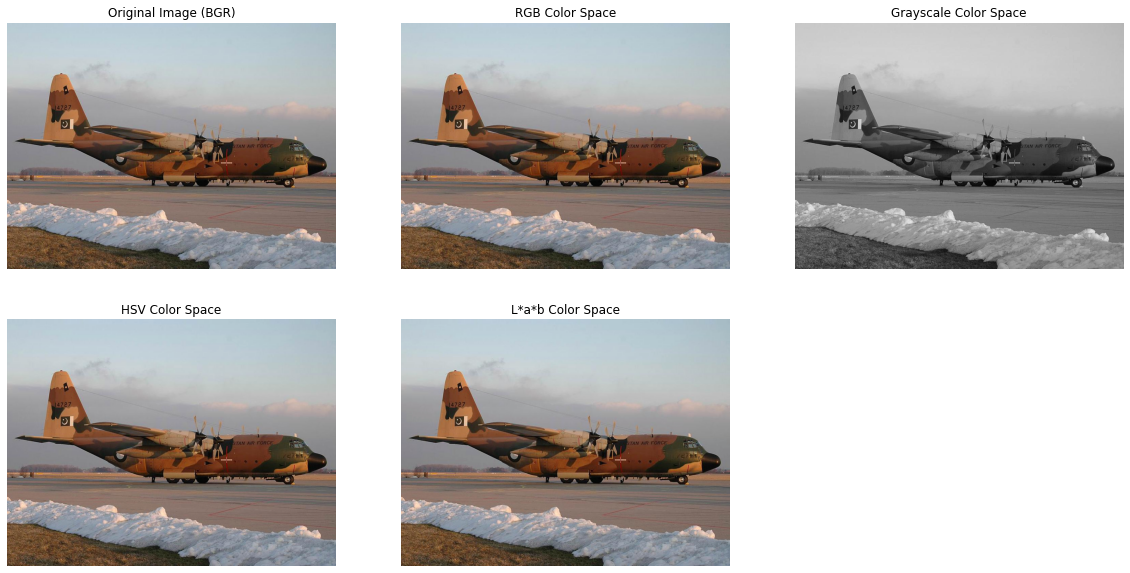

In [43]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'c130.jpg'
image = cv2.imread(image_path)

# Convert to different color spaces using built-in OpenCV functions
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert BGR to Grayscale
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)   # Convert BGR to HSV
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)   # Convert BGR to L*a*b

# Displaying the images using matplotlib
plt.figure(figsize=(20, 10))

# Original image in BGR
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # OpenCV uses BGR, so we convert to RGB for displaying
plt.title('Original Image (BGR)')
plt.axis('off')

# RGB image
plt.subplot(2, 3, 2)
plt.imshow(image_rgb)
plt.title('RGB Color Space')
plt.axis('off')

# Grayscale image
plt.subplot(2, 3, 3)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Color Space')
plt.axis('off')

# HSV image
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)) # Convert HSV back to RGB for displaying
plt.title('HSV Color Space')
plt.axis('off')

# L*a*b image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(image_lab, cv2.COLOR_Lab2RGB)) # Convert L*a*b back to RGB for displaying
plt.title('L*a*b Color Space')
plt.axis('off')

plt.show()


The code above performs color space conversions on an image of a plane and displays the results. Here's a breakdown of each part of the code:

1. **Import Libraries**: We import `cv2` for OpenCV to handle image processing and `matplotlib.pyplot` for displaying images.

2. **Load the Image**: We load the image from the specified path using OpenCV's `imread` function.

3. **Color Space Conversion**:
   - `image_rgb` is obtained by converting the original BGR image to RGB. This is necessary because OpenCV reads images in BGR format by default, but most image display libraries (like `matplotlib`) expect images in RGB format.
   - `image_gray` is a grayscale conversion, which reduces the image to a single channel where only the brightness of each pixel is retained.
   - `image_hsv` represents the image in the HSV color space, which stands for Hue, Saturation, and Value (brightness), providing a more intuitive way to describe color properties.
   - `image_lab` converts the image to the L*a*b color space, which is designed to be more perceptually uniform, meaning that the same amount of numerical change in these values corresponds to about the same amount of visually perceived change.

4. **Displaying Images**:
   - We create a figure with `matplotlib` to hold our subplots.
   - Each `subplot` call prepares a location on a grid where an image will be displayed.
   - We use `imshow` to display each image. For the HSV and L*a*b images, we convert them back to RGB for proper display because `matplotlib` does not handle HSV or L*a*b natively.
   - We set the title of each subplot to indicate the color space of the image being displayed.
   - We turn off the axis with `axis('off')` to make the display cleaner, focusing only on the images.

5. **Show the Result**: Finally, `plt.show()` is called to render all the subplots we've defined.

The original image is shown in the top-left, followed by its RGB version, which looks identical because we've converted it for display purposes. The grayscale image is displayed in black and white, showing only the intensity of light without color. The HSV image may look odd because the color components are interpreted differently in this space. The L*a*b image also may not look correct due to the conversion back to RGB for display purposes; the L*a*b color space is not intended to be displayed directly but is used for color manipulation and analysis.

This demonstration shows how the same image can be represented in different color spaces, each of which has its own use cases in image processing tasks.

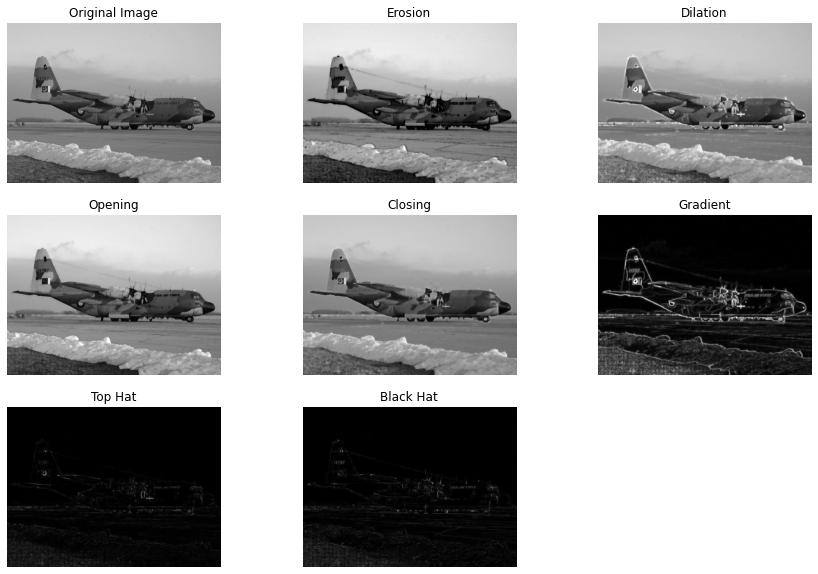

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = 'c130.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the kernel for morphological operations
kernel = np.ones((5,5), np.uint8)

# Apply different morphological operations using the built-in methods
erosion = cv2.erode(original_image, kernel, iterations = 1)
dilation = cv2.dilate(original_image, kernel, iterations = 1)
opening = cv2.morphologyEx(original_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(original_image, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(original_image, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(original_image, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(original_image, cv2.MORPH_BLACKHAT, kernel)

# Display the original and morphologically transformed images
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(opening, cmap='gray')
plt.title('Opening')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(closing, cmap='gray')
plt.title('Closing')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(tophat, cmap='gray')
plt.title('Top Hat')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(blackhat, cmap='gray')
plt.title('Black Hat')
plt.axis('off')

plt.show()


The code performs several morphological operations on an image using OpenCV's built-in methods. Morphological operations are simple transformations applied to the shape or structure of features in an image. They are particularly useful in preprocessing steps, such as removing noise, isolating individual elements, and joining disparate elements in an image.

Here's what each part of the code does:

1. **Import Libraries:**
   - `cv2`: OpenCV library for computer vision tasks.
   - `numpy`: Library for numerical operations, used here to create the structuring element or kernel.
   - `matplotlib.pyplot`: Library for plotting, used here to display images.

2. **Load Image in Grayscale:**
   - The image is loaded in grayscale format. Grayscale is used because morphological operations are typically applied to binary or grayscale images.

3. **Define Kernel:**
   - A kernel or structuring element is defined, which is a matrix used to determine the nature of the operation. The kernel slides over the image, and the operation is applied to the neighborhood of each pixel.

4. **Morphological Operations:**
   - `cv2.erode()`: Erosion operation, which erodes away the boundaries of the foreground object. It is used to reduce the size of foreground objects.
   - `cv2.dilate()`: Dilation operation, which increases the size of the foreground object. It is used to accentuate features.
   - `cv2.morphologyEx()`: This function is used with different flags to perform different operations:
      - `cv2.MORPH_OPEN`: Opening operation, which is erosion followed by dilation. It is useful in removing noise.
      - `cv2.MORPH_CLOSE`: Closing operation, which is dilation followed by erosion. It is useful in closing small holes or gaps in the foreground object.
      - `cv2.MORPH_GRADIENT`: Morphological Gradient operation, which is the difference between dilation and erosion of an image. It is used to outline the boundaries of objects.
      - `cv2.MORPH_TOPHAT`: Top Hat operation, which is the difference between the input image and Opening of the image. It shows small elements brighter than the surrounding elements.
      - `cv2.MORPH_BLACKHAT`: Black Hat operation, which is the difference between the Closing of the input image and input image. It shows small holes or dark regions which are smaller than the structuring element.

5. **Display Images:**
   - Using `matplotlib.pyplot`, we plot the original image alongside the images that result from each morphological operation. Each subplot is labeled with the name of the operation applied.

The output images display the effects of the morphological operations on the input image:

- **Erosion** makes the airplane thinner and some parts of the airplane disappear, showing the effect of eroding the boundaries of objects.
- **Dilation** makes the airplane look bolder and bridges small gaps and holes.
- **Opening** cleans up the noise in the background without affecting the size and shape of the airplane much.
- **Closing** is useful for closing small holes inside the foreground objects, or small black points on the object.
- **Gradient** provides the outline of the airplane by showing the difference in pixel intensity between the dilation and the erosion of the airplane.
- **Top Hat** reveals bright regions smaller than the structuring element on a dark background.
- **Black Hat** reveals dark regions smaller than the structuring element on a bright background.